In [1]:
from IPython.display import Image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

逻辑斯蒂回归假设二分类的分界面为线性的，即
$$
P(C_1|x)=\sigma _{w,b}(z)=\sigma(\sum w_ix_i+b)=f_{w,b}(x)
$$
如何选择最优的w和b呢，还是用**极大似然法**。

对似然函数取对数，取负号，并根据类别的取值0，1，就可以**由似然函数得到交叉熵损失函数**，如下图所示。


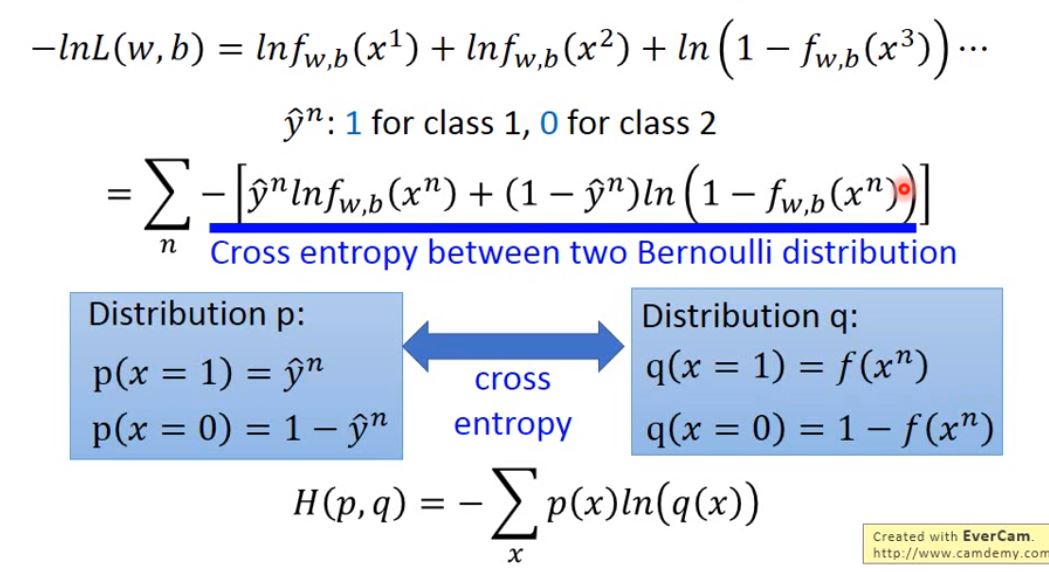

In [7]:

Image(filename = r'D:\jupyter_notebooks\Github笔记\algorithm\pictures\li9.jpg', width=500, height=200)



**交叉熵衡量的是两个分布的相似程度，如果两个分布完全一致，则交叉熵为0。**

**这也为什么要用0，1表示类别，因为概率的取值范围是[0,1]，只有用0，1表示类别，才能将似然函数写成交叉熵损失函数的形式。**

有了损失函数后，用梯度下降法求出w,b。

LR和线性回归和对比如下图所示。


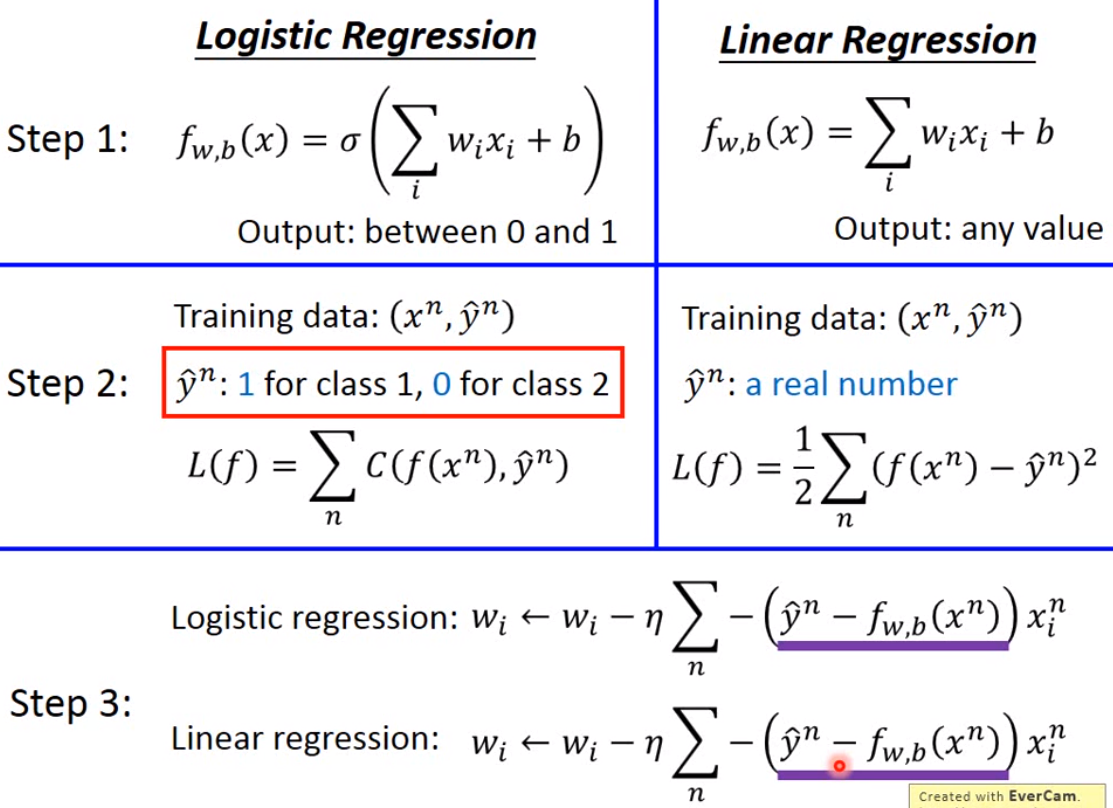

In [9]:

Image(filename = r'D:\jupyter_notebooks\Github笔记\algorithm\pictures\li10.jpg', width=500, height=200)


可以看出，LR梯度下降中$w_i$更新式子的形式和线性回归一样。

LR如果用平方损失函数，那么从w的求导表达式可以看出，当真实值和预测值相差很大时，梯度仍然很小，不符合逻辑。

---
总结一下，LR（判别式模型）其实和生成式模型（前提是如果是高斯分布，二者share同一个协方差矩阵）的model（function set）是一样的，都是
$$
P(C_1|x)=\sigma _{w,b}(z)=\sigma(\sum w_ix_i+b)
$$
**二者的区别在于，LR没有任何前提假设，直接求解参数w,b；而生成式模型需要假设样本在每个类别下服从某种分布，然后求出分布的参数（如$u_1,u_2,\Sigma$），然后由这些分布的参数再得到w,b。因此，二者找出的w,b通常是不同的。**

通常情况下，判别式模型的效果会比生成式模型的效果好一些。生成式模型会“脑补”一些数据集中没有发生的情况，会对noise鲁棒一些。

---
对于多分类问题，可以将sigmoid函数换为softmax函数，损失函数仍然用多变量的交叉熵损失函数。


---
LR无法解决线性不可分问题，这是模型本身的问题，可以通过feature转换来解决。

如果将多个LR串接起来，其实每个LR相当于做了不同的feature转换，即一个神经元，这些LR的组合其实就是神经网络。